In [1]:
import os
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from scipy import stats

# Viewing the time series in a plot

In [2]:
dataPath = '2016-2019_sensorData.csv'
airQualityData=pd.read_csv(dataPath, header=0,)
airQualityData.head(1)
airQualityData['Start'] = pd.to_datetime(airQualityData['Start']) #converts the start column into a proper datatime type in order to plot

#### View percentage of available data

<AxesSubplot:>

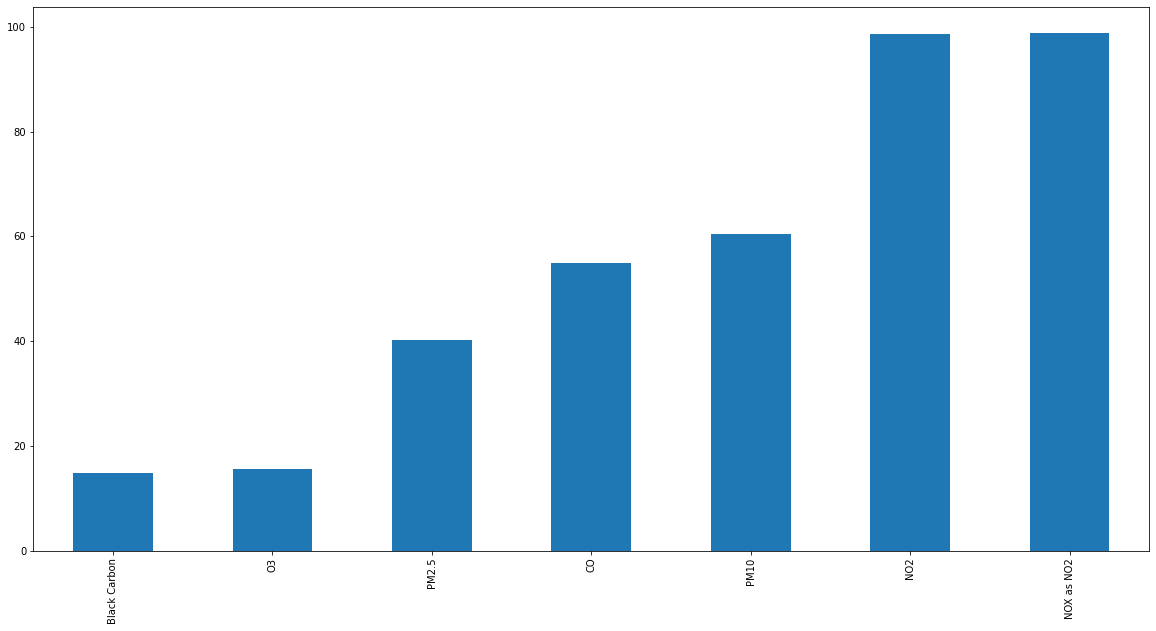

In [72]:
total = airQualityData.isnull().sum().sort_values(ascending = False)
total = total[airQualityData.isnull().sum().sort_values(ascending = False) != 0]
percent =  100 - total / len(airQualityData) * 100
percent[airQualityData.isnull().sum().sort_values(ascending = False) != 0].plot.bar(figsize = (20,10))

# 1- Autocorrelation

<AxesSubplot:xlabel='Start', ylabel='PM10'>

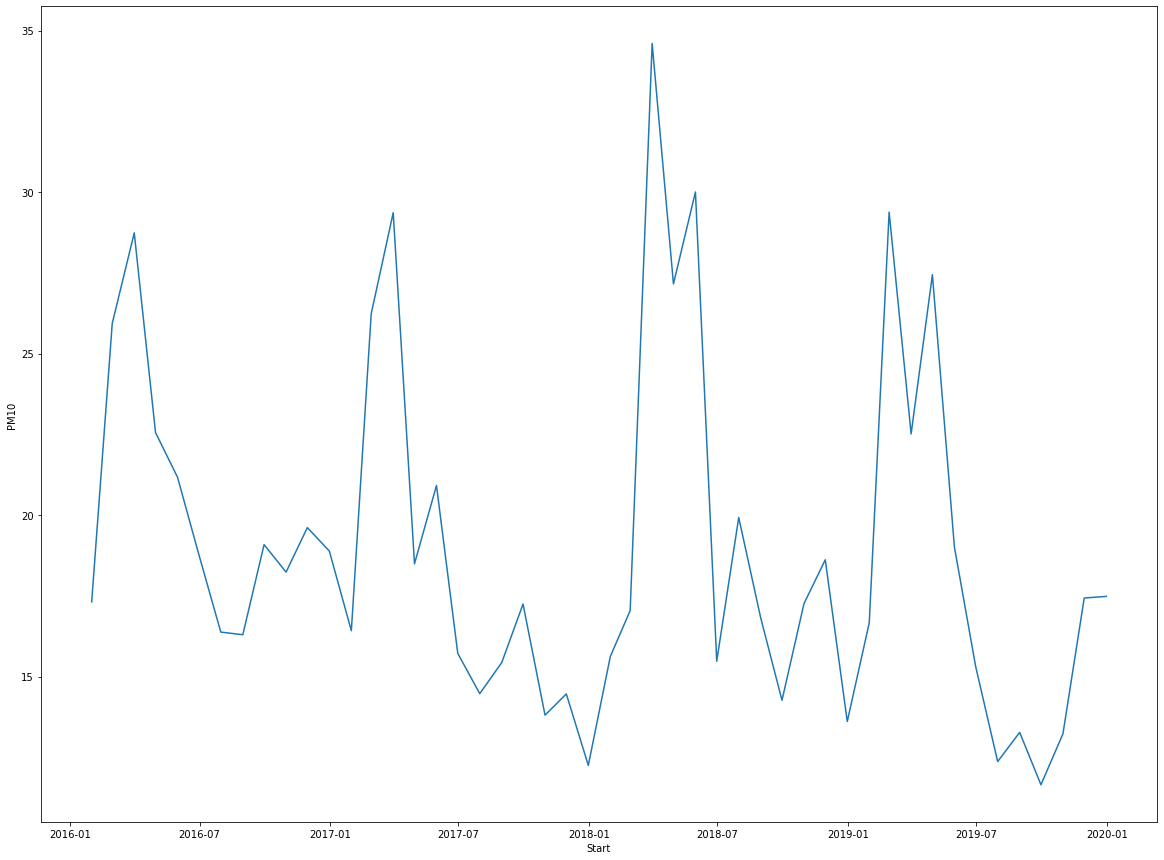

In [75]:
resampled=airQualityData.groupby(['Start']).mean().resample('1m').mean().ffill()#resampling into 4 hours with mean taken of the 4 hours values
fig , ax =  plt.subplots(figsize=(20,15))
sns.lineplot(data=resampled['PM10'],ax=ax)

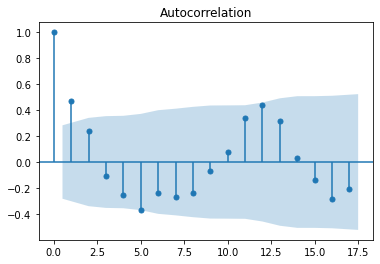

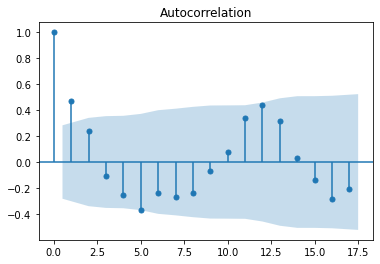

In [104]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(resampled['PM10'])

In [89]:
airQualityData.groupby(['Start']).mean().resample('4h').mean()

,NO2,NOX as NO2,PM2.5,CO,Black Carbon,O3,National Station Code,Longitude,Latitude,PM10
Start,,,,,,,,,,
2016-01-01 00:00:00,20.458333,33.386111,10.85625,0.274583,0.777750,58.8250,14765.666667,18.050490,59.328027,20.505000
2016-01-01 04:00:00,14.361111,23.511111,7.68125,0.236250,0.800000,58.8500,14765.666667,18.050490,59.328027,13.045000
2016-01-01 08:00:00,10.525000,16.100000,7.05625,0.203750,0.756250,61.2750,14765.666667,18.050490,59.328027,17.225000
2016-01-01 12:00:00,17.636111,29.311111,6.38750,0.210000,0.664750,61.5125,14765.666667,18.050490,59.328027,28.685000
2016-01-01 16:00:00,15.305556,23.852778,4.42500,0.195833,0.464000,63.1750,14765.666667,18.050490,59.328027,23.490000
...,...,...,...,...,...,...,...,...,...,...
2019-12-31 04:00:00,3.031818,4.965909,0.34500,0.341667,0.066412,70.9250,54084.545455,18.045615,59.325836,2.703571
2019-12-31 08:00:00,7.745455,13.197727,1.40500,0.391667,0.076487,74.0250,54084.545455,18.045615,59.325836,22.089286
2019-12-31 12:00:00,12.115909,19.865909,3.05500,0.400000,0.184750,74.1750,54084.545455,18.045615,59.325836,30.503571


# 2-Correlation


In [64]:
processed_df=airQualityData.drop(columns=['Start','Stop','Station Name','Classification','Longitude','Latitude','National Station Code'])

#### With outliers and missing data

<AxesSubplot:>

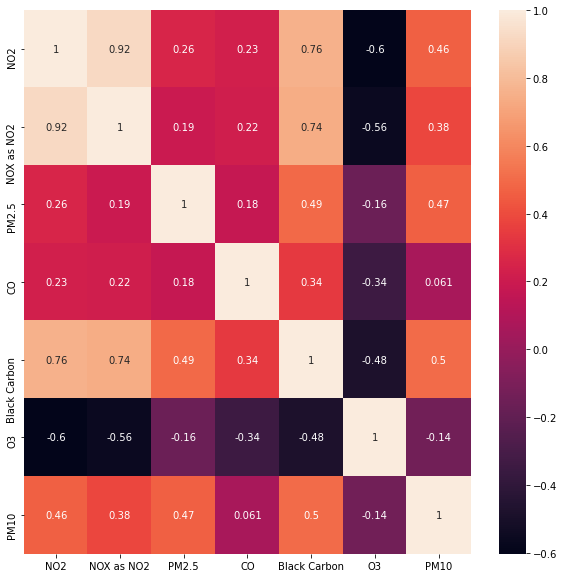

In [69]:
fig , ax =plt.subplots(figsize=(10,10))
sns.heatmap(processed_df.corr(), annot=True)

#### With outliers and no missing data for black carbon

<AxesSubplot:>

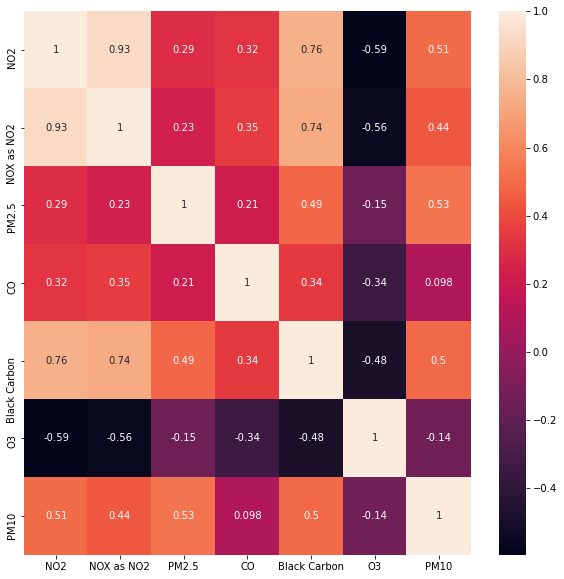

In [70]:
fig , ax =plt.subplots(figsize=(10,10))
sns.heatmap(processed_df[processed_df['Black Carbon'].notnull()].corr(), annot=True)

#### With outliers and no missing data for O3

<AxesSubplot:>

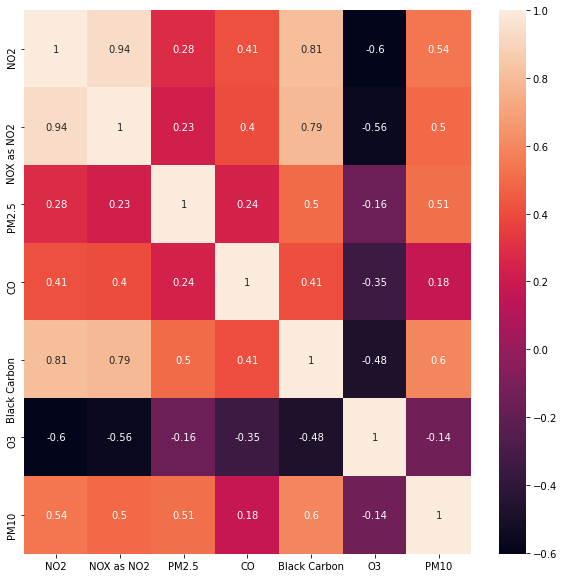

In [41]:
fig , ax =plt.subplots(figsize=(10,10))
sns.heatmap(processed_df[processed_df['O3'].notnull()& processed_df['PM10'].notnull()].corr(), annot=True)

#### With outliers and no missing data for CO

<AxesSubplot:>

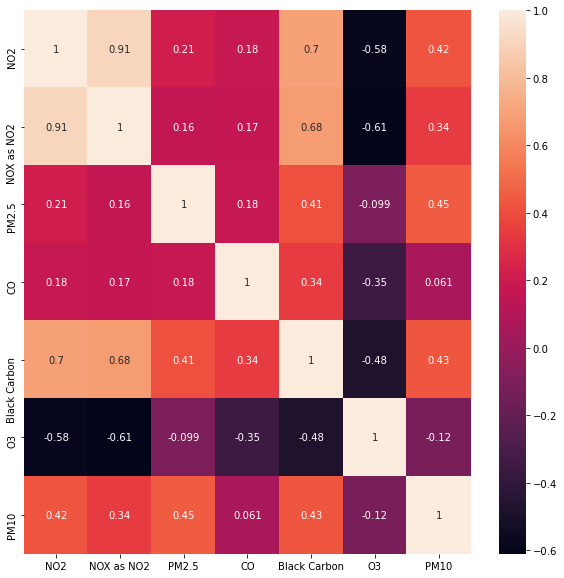

In [71]:
fig , ax =plt.subplots(figsize=(10,10))
sns.heatmap(processed_df[processed_df['CO'].notnull() & processed_df['PM10'].notnull()].corr(), annot=True)

#### Without outliers

NO2             26.400
NOX as NO2      54.100
PM2.5            4.900
CO               0.150
Black Carbon     0.682
O3              31.200
PM10            14.400
dtype: float64


<AxesSubplot:>

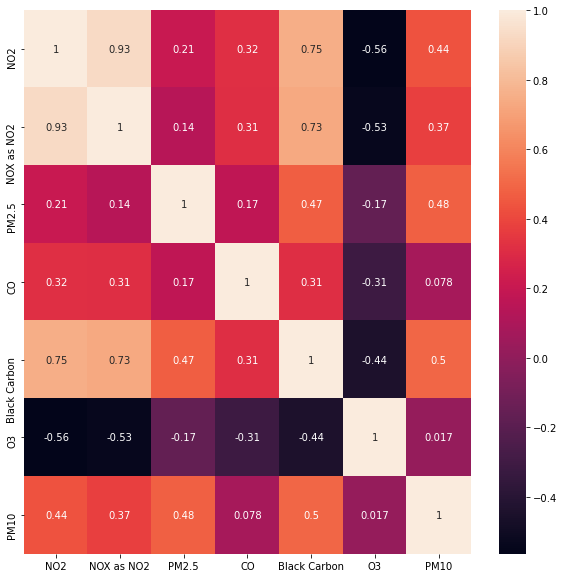

In [25]:
Q1 = processed_df.quantile(0.25)
Q3=  processed_df.quantile(0.75)
IQR= Q3-Q1
print(IQR)
processed_df_Outlier= processed_df[~((processed_df < (Q1 - 1.5 * IQR)) |(processed_df > (Q3 + 1.5 * IQR))).any(axis=1)]
fig , ax =plt.subplots(figsize=(10,10))
sns.heatmap(processed_df_Outlier.corr(), annot=True)